# 图像梯度处理

## 图像梯度——Sobel算子

$$
G_x = \begin{pmatrix}-1&0&1\\-2&0&2\\ -1&0&1 \end{pmatrix} * A
$$

$$
G_y = \begin{pmatrix}-1&-2&-1\\0&0&0\\ 1&2&1 \end{pmatrix} * A
$$

- $G_x$为右减左，$G_y$为下减上

In [1]:
# 导入库
import cv2
import matplotlib.pyplot as plt
import numpy as np

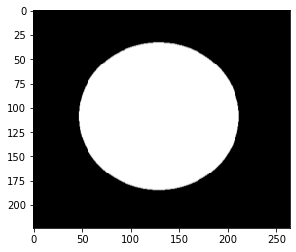

In [2]:
# 加载源图像
img = cv2.imread('pie.jpg')
plt.imshow(img)

**dst = cv2.Sobel(src, ddepth, dx, dy, ksize)**
- ddepth：图像深度（通常情况下为-1）
- dx和dy分别表示水平和竖直方向
- ksize是Sobel算子的大小（通常情况下为3x3或5x5）

In [5]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


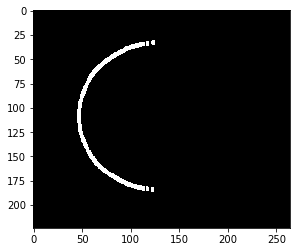

In [7]:
# cv2.CV_64F增加了像素值的表示范围，使负数不会被截断
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)
plt.imshow(sobel_x)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


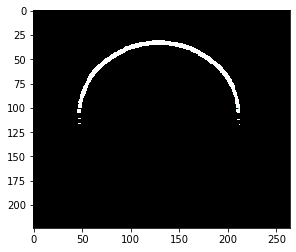

In [8]:
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)
plt.imshow(sobel_y)

> 白到黑是正数，黑到白是负数，所有的负数会被截断为0，因此需要取绝对值

(<matplotlib.axes._subplots.AxesSubplot at 0x12619fbd0>,
 Text(0.5, 1.0, 'sobel_y'))

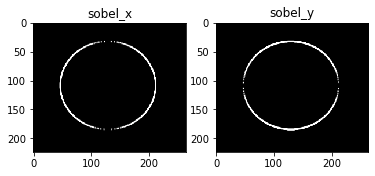

In [10]:
sobel_x_abs = cv2.convertScaleAbs(sobel_x)
sobel_y_abs = cv2.convertScaleAbs(sobel_y)
plt.subplot(121), plt.imshow(sobel_x_abs), plt.title('sobel_x')
plt.subplot(122), plt.imshow(sobel_y_abs), plt.title('sobel_y')
plt.show()

分别计算x和y，再求和

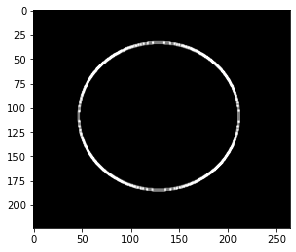

In [11]:
sobel_xy = cv2.addWeighted(sobel_x_abs, 0.5, sobel_y_abs, 0.5, 0)
plt.imshow(sobel_xy)

不建议直接计算

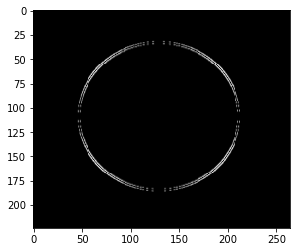

In [14]:
sobel_x_y = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize = 3)
sobel_x_y_abs = cv2.convertScaleAbs(sobel_x_y)
plt.imshow(sobel_x_y_abs)

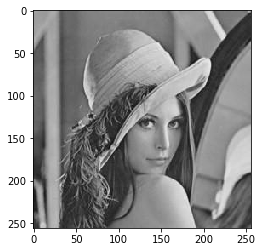

In [21]:
img_lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img_lena, cmap=plt.cm.gray, vmin=0,vmax=255)

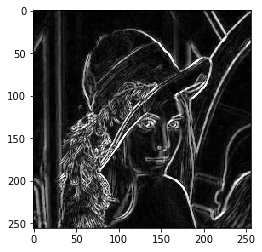

In [25]:
sobelx = cv2.Sobel(img_lena, cv2.CV_64F, 1, 0, ksize = 3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img_lena, cv2.CV_64F, 0, 1, ksize = 3)
sobely = cv2.convertScaleAbs(sobely)
sobel_res = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
plt.imshow(sobel_res, cmap=plt.cm.gray, vmin=0,vmax=255)

(<matplotlib.axes._subplots.AxesSubplot at 0x12d5ace10>,
 Text(0.5, 1.0, 'sobel_10+sobel_01'))

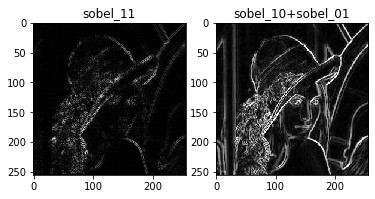

In [27]:
# 对比效果
sobel_11 = cv2.Sobel(img_lena, cv2.CV_64F, 1, 1, ksize = 3)
sobel_11 = cv2.convertScaleAbs(sobel_11)
plt.subplot(121), plt.imshow(sobel_11, cmap = plt.cm.gray), plt.title('sobel_11')
plt.subplot(122), plt.imshow(sobel_res, cmap = plt.cm.gray), plt.title('sobel_10+sobel_01')

## 图像梯度——Scharr算子
$$
G_x = \begin{pmatrix} -3&0&3\\ -10&0&10\\ -3&0&3 \end{pmatrix}
$$

$$
G_y = \begin{pmatrix} -3&-10&-3\\ 0&0&0\\ 3&10&3 \end{pmatrix}
$$

## 图像梯度——Laplacian算子
$$
G= \begin{pmatrix} 0&1&0\\ 1&-4&1\\ 0&1&0 \end{pmatrix}
$$

> Laplacian算子关注二阶导，但是对于噪音点会比较敏感

> Laplacian算子使用时往往要结合其他方法一起使用

(<matplotlib.axes._subplots.AxesSubplot at 0x12e765ad0>,
 Text(0.5, 1.0, 'laplacian'))

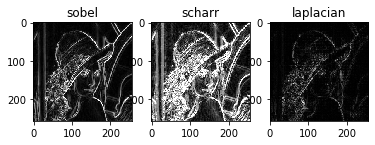

In [35]:
# 不同算子的差异：
img_lena = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel算子
sobelx = cv2.Sobel(img_lena, cv2.CV_64F, 1, 0, ksize = 3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img_lena, cv2.CV_64F, 0, 1, ksize = 3)
sobely = cv2.convertScaleAbs(sobely)
sobel_res = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

# Scharr算子
scharr_x = cv2.Scharr(img_lena, cv2.CV_64F, 1, 0)
scharr_x_abs = cv2.convertScaleAbs(scharr_x)
scharr_y = cv2.Scharr(img_lena, cv2.CV_64F, 0, 1)
scharr_y_abs = cv2.convertScaleAbs(scharr_y)
scharr_res = cv2.addWeighted(scharr_x_abs, 0.5, scharr_y_abs, 0.5, 0)

# Laplacian算子
laplacian = cv2.Laplacian(img_lena, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

plt.subplot(131), plt.imshow(sobel_res, cmap=plt.cm.gray), plt.title('sobel')
plt.subplot(132), plt.imshow(scharr_res, cmap=plt.cm.gray), plt.title('scharr')
plt.subplot(133), plt.imshow(laplacian, cmap=plt.cm.gray), plt.title('laplacian')

> Scharr算子相比Sobel算子关注的细节更多，更加敏感